In [1]:
import pandas as pd

# Charger le dataset
data = pd.read_csv(r"C:\Users\mouna\Desktop\customer_data.csv")

# Afficher les premières lignes du dataset
data.head()

,name,age,gender,education,income,country,purchase_frequency,spending
0,Teresa Williams MD,42,Female,High School,53936,Slovenia,0.9,13227.120
1,Christine Myers,49,Female,Master,82468,Aruba,0.6,12674.040
2,Dwayne Moreno,55,Male,Bachelor,56941,Cyprus,0.3,5354.115
3,Amy Norton,24,Female,Bachelor,60651,Palau,0.2,2606.510
4,Tonya Adams,64,Male,Master,81884,Zambia,0.9,18984.780


In [3]:
# Vérifier les valeurs manquantes
print(data.isnull().sum())

# Supposons qu'il n'y ait pas de valeurs manquantes, sinon il faudra les traiter.

# Convertir les variables catégorielles en variables numériques
data_encoded = pd.get_dummies(data, columns=['gender', 'education', 'country'])

# Sélectionner les caractéristiques pertinentes
features = ['purchase_frequency', 'spending']  # Ajoutez ou modifiez en fonction de vos besoins
X = data_encoded[features]

name                  0
age                   0
gender                0
education             0
income                0
country               0
purchase_frequency    0
spending              0
dtype: int64


In [7]:
from sklearn.preprocessing import StandardScaler

# Supposons que vous ayez déjà défini vos caractéristiques dans `features`
# Ex. `features = ['purchase_frequency', 'spending']`
X = data[features]

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
from sklearn.cluster import KMeans

# Initialisation de KMeans avec k=4 comme exemple
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init=10)

In [11]:
# Ajuster KMeans aux données normalisées
try:
    kmeans.fit(X_scaled)
except Exception as e:
    print(f"Une erreur est survenue: {e}")

In [13]:
# Ajouter les labels des clusters aux données
data['Cluster'] = kmeans.labels_

In [15]:
# Afficher les premières lignes des données avec les clusters
print(data.head())

                 name  age  gender    education  income   country  \
0  Teresa Williams MD   42  Female  High School   53936  Slovenia   
1     Christine Myers   49  Female       Master   82468     Aruba   
2       Dwayne Moreno   55    Male     Bachelor   56941    Cyprus   
3          Amy Norton   24  Female     Bachelor   60651     Palau   
4         Tonya Adams   64    Male       Master   81884    Zambia   

   purchase_frequency   spending  Cluster  
0                 0.9  13227.120        3  
1                 0.6  12674.040        3  
2                 0.3   5354.115        0  
3                 0.2   2606.510        0  
4                 0.9  18984.780        1  


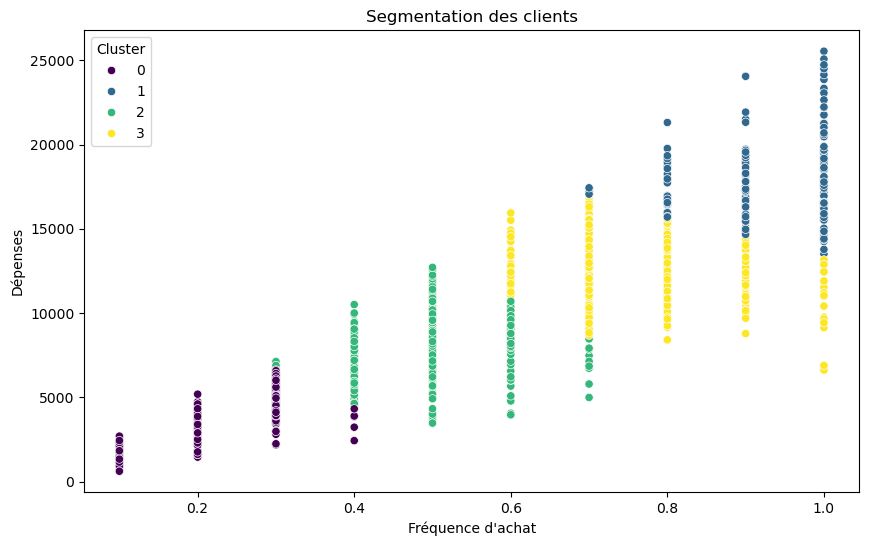

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualiser les clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='purchase_frequency', y='spending', hue='Cluster', data=data, palette='viridis')
plt.title('Segmentation des clients')
plt.xlabel('Fréquence d\'achat')
plt.ylabel('Dépenses')
plt.legend(title='Cluster')
plt.show()



In [21]:
cluster_summary = data.groupby('Cluster')[features].mean()
print(cluster_summary)


         purchase_frequency      spending
Cluster                                  
0                  0.197183   3289.571039
1                  0.926744  17993.742267
2                  0.492251   8070.120129
3                  0.753846  12443.708553
